Text(0, 0.5, 'Relative error')

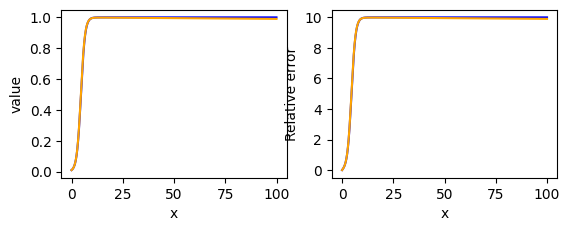

In [1]:
import math
import matplotlib.pyplot as plt
repeat=5000
e=00000000000.1
def Euler(f,x1,t0,tend):           
    x01=x1
    deltat=(tend-t0)/repeat
    for i in range(repeat):
        x01=x01+f(x01)*deltat
    return x01
def t_scale(t0,tend):
    deltat=(tend-t0)/repeat
    return [ i*deltat for i in range (repeat) ]
def Ecent(f,x1,t0,tend):            
    x01=x1
    deltat=(tend-t0)/repeat
    for i in range(repeat):
        x01=x01+f(x01+deltat/2)*deltat
    return x01
def f1(x):
    return x*(1.0-x)
listf11=list(map(lambda t: Euler(f1,0.01,0,t),t_scale(0,100)))
plt.subplot(2,2,1)
plt.plot(t_scale(0,100),listf11,color='blue',label='オイラー法')
listf12=list(map(lambda t: Ecent(f1,0.01,0,t),t_scale(0,100)))
plt.plot(t_scale(0,100),listf12,color='orange',label='中点法')
plt.xlabel('x')
plt.ylabel('value')
def analy(x):
    return 0.01/(0.01+(1-0.01)*math.exp(x))
def erroreu(x1,t0,t):
    return abs((analy(t)-Euler(f1,x1,t0,t))/(analy(t)+e))
def errorce(x1,t0,t):
    return abs((analy(t)-Ecent(f1,x1,t0,t))/(analy(t)+e))
plt.subplot(2,2,2)
listf13=list(map(lambda t: erroreu(0.01,0,t),t_scale(0,100)))
plt.plot(t_scale(0,100),listf13,color='blue',label='オイラー法')
listf14=list(map(lambda t: errorce(0.01,0,t),t_scale(0,100)))
plt.plot(t_scale(0,100),listf14,color='orange',label='中点法')
plt.xlabel('x')
plt.ylabel('Relative error')